<a href="https://colab.research.google.com/github/cz101/ML-TF/blob/main/TF2_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
print(tf.__version__)

2.8.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [16]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test ,y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [17]:
x_train =np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [18]:
K= len(set(y_train))
print("number of calsses :",K)

number of calsses : 10


In [19]:
from threading import active_count
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2 ,activation='relu')(i)
x = Conv2D(64,(3,3), strides=2 ,activation='relu')(x)
x = Conv2D(128,(3,3), strides=2 ,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5272 - accuracy: 0.8052 - val_loss: 0.3971 - val_accuracy: 0.8497
Epoch 2/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3677 - accuracy: 0.8625 - val_loss: 0.3615 - val_accuracy: 0.8627
Epoch 3/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3178 - accuracy: 0.8804 - val_loss: 0.3402 - val_accuracy: 0.8721
Epoch 4/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2823 - accuracy: 0.8954 - val_loss: 0.3002 - val_accuracy: 0.8906
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2553 - accuracy: 0.9040 - val_loss: 0.2935 - val_accuracy: 0.8927
Epoch 6/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2364 - accuracy: 0.9109 - val_loss: 0.3011 - val_accuracy: 0.8885
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2165 - accuracy: 0.9183 - val_loss: 0.2861 -

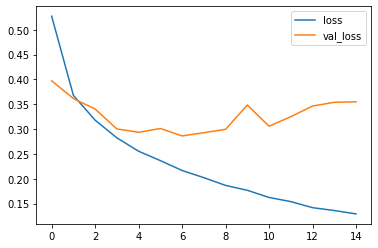

In [23]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

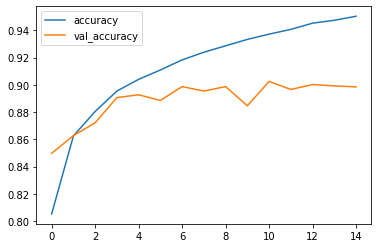

In [24]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()